In [1]:
from latex_figure import plotfigure
import numpy
import pandas

In [2]:
aspect_ratio = 4 / 5
FULLSIZE = 5, 5 * aspect_ratio
HALFSIZE = 3, 3 * aspect_ratio

In [3]:
filename = "Overall Linearity.pdf"

In [4]:
full_range = pandas.read_csv('long_span_run 20200226 overnight')

In [5]:
middle_range = pandas.read_csv('long_span_run 20200227 overnight.csv')

In [6]:
Q1 = 0

q_full = []
T_full = []

for index, row in full_range.iterrows():
#     print (index)
    if row['Q1'] != Q1:
        Q1 = row['Q1']
        
#         print (full_range.iloc[index-1])
        
        q_full.append(full_range.iloc[index-1]['Q1'])
        T_full.append(full_range.iloc[index-1]['T1'])
q_full.append(full_range.iloc[-1]['Q1'])
T_full.append(full_range.iloc[-1]['T1'])

In [7]:
Q1 = 50

q_middle = []
T_middle = []

for index, row in middle_range.iterrows():
#     print (index)
    if row['Q1'] != Q1:
        Q1 = row['Q1']
        
#         print (middle_range.iloc[index-1])
        
        q_middle.append(middle_range.iloc[index-1]['Q1'])
        T_middle.append(middle_range.iloc[index-1]['T1'])
q_middle.append(middle_range.iloc[-1]['Q1'])
T_middle.append(middle_range.iloc[-1]['T1'])

In [8]:
qs = [q_full, q_middle, [q_full[0], q_full[-1]]]
Ts = [T_full, T_middle, [T_full[0], T_full[-1]]]

In [9]:
Linetypes = ['ro','go', 'b']

x_label = 'Q1 Value'
y_label = 'T1 Steady State'

YNAMES = ['Full Range', 'Around 50', 'Linear']

filename = "Linearity Figure.pdf"

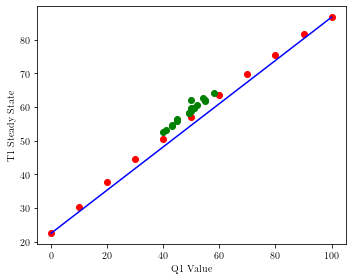

In [10]:
plotfigure(qs, Ts, YNAMES, Linetypes, x_label, y_label ,FULLSIZE, filename, diff=False, legend=False)